In [2]:
import ruamel.yaml as yaml
import os
import sys
import pandas as pd
import numpy as np
import pandas_profiling
import altair as alt
alt.themes.enable('opaque')


NO_CONFIG_ERR_MSG = """No config file found. Root directory is determined by presence of "config.yaml" file."""

original_wd = os.getcwd()

# Number of times to move back in directory
num_retries = 10
for x in range(0, num_retries):
    # try to load config file
    try:
        with open("config.yaml", 'r') as stream:
            cfg = yaml.safe_load(stream)
    # If not found move back one directory level
    except FileNotFoundError:
        os.chdir('../')
        # If reached the max number of directory levels change to original wd and print error msg
        if x+1 == num_retries:
            os.chdir(original_wd)
            print(NO_CONFIG_ERR_MSG)

# Add directory to PATH
path = os.getcwd()

if path not in sys.path:
    sys.path.append(path)

# Load Data

In [3]:
madelon_df = pd.read_hdf('data/processed/datasets.hdf', 'madelon', complib='blosc', complevel=9)

# Uncomment hdf to use process text (i.e. no Rings)
abalone_df = pd.read_hdf('data/processed/datasets.hdf', 'abalone', complib='blosc', complevel=9)

5. Discussion: Algorithms Analysis
    * For each algorithm: 
        * Train/Test Error Rates
            * At the end if there's enough time, might want to add
            precision, recall, f1 score as metrics on best hyper param models
        * Training Time
        * Learning Rate
        * 'Overfitting' Curves (Expressiveness)
        * Hyperparameter Analysis
            * Why did these come out the best? 
            Discuss what each parameter does and reasoning for why that performed best. 
            Look at Grid search results if possible to see if distribution of params change 
            the outcome much (i.e. the effect of param on performance)



#### Artificial Neural Network



Ideas:

Best Params --> Justification

Columns

* LC, Complexity Curve, and OF curve as columns in Altair plot

Rows

* Datasets

Color

* Train Test

Facet Plot


## Params

In [4]:
DATASET = 'abalone'
ALGORITHM = 'ANN'
from pathlib import Path
RESULTS_PATH = Path('reports/output')

# Loop through and find relevant files
relevant_files = []
for file in os.listdir(RESULTS_PATH):
    #print(file)
    fname_split = file.split("_")
    # Split last string on extension
    file_ext = fname_split.pop()
    fname_split = fname_split + file_ext.split('.')
    #print(fname_split)
    if (DATASET in fname_split) & (ALGORITHM in fname_split):
        relevant_files.append(file)
relevant_files        

['ANN_abalone_LC_test.csv',
 'ANN_abalone_LC_train.csv',
 'ANN_abalone_reg.csv',
 'ANN_abalone_timing.csv',
 'ITERtestSET_ANN_abalone.csv',
 'ITERtestSET_ANN_OF_abalone.csv',
 'ITER_base_ANN_abalone.csv',
 'ITER_base_ANN_OF_abalone.csv']

In [69]:
def get_df_dict_from_algorithm_dataset(directory_path, dataset=None, 
                                       algorithm=None):
    
    from pathlib import Path
    results_path = Path(directory_path)

    # Loop through and find relevant files
    relevant_files = []
    # Dictionary to hold relevant files
    df_dict = {}
    
    for file in os.listdir(results_path):
        fname_split = file.split("_")
        # Split last string on extension
        file_ext = fname_split.pop()
        fname_split = fname_split + file_ext.split('.')
        #print(fname_split)
        if (dataset in fname_split) & (algorithm in fname_split):
            relevant_files.append(file)
            
    for fname in relevant_files:
        key = fname.split('.')[0]
        df_dict[key] = pd.read_csv(RESULTS_PATH / fname)        
            
    return df_dict
test_df_dict = get_df_dict_from_algorithm_dataset('reports/output/', algorithm='ANN', dataset='madelon')
test_df_dict.keys()

dict_keys(['ANN_madelon_LC_test', 'ANN_madelon_LC_train', 'ANN_madelon_reg', 'ANN_madelon_timing', 'ITERtestSET_ANN_madelon', 'ITERtestSET_ANN_OF_madelon', 'ITER_base_ANN_madelon', 'ITER_base_ANN_OF_madelon'])

## Load Best Params for each algorithm 

In [5]:
results = pd.read_csv('reports/output/test-results-reduced.csv')
results

,Algorithm,Dataset,Score,Hyperparameters,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,ANN,madelon,0.762821,{'MLP__activation': 'relu','MLP__alpha': 0.0001,'MLP__hidden_layer_sizes': (62,62.0,62)}
1,ANN,abalone,0.621138,{'MLP__activation': 'relu','MLP__alpha': 1.0,'MLP__hidden_layer_sizes': (20,20.0,20)}
2,Boost,madelon,0.826923,{'Boost__base_estimator__alpha': -0.001,'Boost__n_estimators': 5},NaN,NaN,NaN
3,Boost,abalone,0.628263,{'Boost__base_estimator__alpha': 0.03162277660...,'Boost__n_estimators': 20},NaN,NaN,NaN
4,DT,madelon,0.810256,{'DT__alpha': 0,'DT__class_weight': 'balanced','DT__criterion': 'gini'},NaN,NaN
5,DT,abalone,0.618223,{'DT__alpha': 0.01,'DT__class_weight': 'balanced','DT__criterion': 'gini'},NaN,NaN
6,KNN,madelon,0.864103,{'KNN__metric': 'manhattan','KNN__n_neighbors': 10,'KNN__weights': 'distance'},NaN,NaN
7,KNN,abalone,0.628263,{'KNN__metric': 'chebyshev','KNN__n_neighbors': 34,'KNN__weights': 'distance'},NaN,NaN
8,SVM_Lin,madelon,0.601282,{'SVM__alpha': 0.1,'SVM__n_iter': 687},NaN,NaN,NaN
9,SVM_Lin,abalone,0.622048,{'SVM__alpha': 0.0001,'SVM__n_iter': 428},NaN,NaN,NaN


Collapsing Hyperparameters into the one column

    1) From 'Hyperparameters' column on turn them into strings
    2) Sum across the row

In [6]:
results['Best_Params'] = results.loc[:, 'Hyperparameters':].astype(str).sum(axis=1)

In [70]:
results

,Algorithm,Dataset,Score,Hyperparameters,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Best_Params
0,ANN,madelon,0.762821,{'MLP__activation': 'relu','MLP__alpha': 0.0001,'MLP__hidden_layer_sizes': (62,62.0,62)},{'MLP__activation': 'relu' 'MLP__alpha': 0.000...
1,ANN,abalone,0.621138,{'MLP__activation': 'relu','MLP__alpha': 1.0,'MLP__hidden_layer_sizes': (20,20.0,20)},{'MLP__activation': 'relu' 'MLP__alpha': 1.0 '...
2,Boost,madelon,0.826923,{'Boost__base_estimator__alpha': -0.001,'Boost__n_estimators': 5},NaN,NaN,NaN,{'Boost__base_estimator__alpha': -0.001 'Boost...
3,Boost,abalone,0.628263,{'Boost__base_estimator__alpha': 0.03162277660...,'Boost__n_estimators': 20},NaN,NaN,NaN,{'Boost__base_estimator__alpha': 0.03162277660...
4,DT,madelon,0.810256,{'DT__alpha': 0,'DT__class_weight': 'balanced','DT__criterion': 'gini'},NaN,NaN,{'DT__alpha': 0 'DT__class_weight': 'balanced'...
5,DT,abalone,0.618223,{'DT__alpha': 0.01,'DT__class_weight': 'balanced','DT__criterion': 'gini'},NaN,NaN,{'DT__alpha': 0.01 'DT__class_weight': 'balanc...
6,KNN,madelon,0.864103,{'KNN__metric': 'manhattan','KNN__n_neighbors': 10,'KNN__weights': 'distance'},NaN,NaN,{'KNN__metric': 'manhattan' 'KNN__n_neighbors'...
7,KNN,abalone,0.628263,{'KNN__metric': 'chebyshev','KNN__n_neighbors': 34,'KNN__weights': 'distance'},NaN,NaN,{'KNN__metric': 'chebyshev' 'KNN__n_neighbors'...
8,SVM_Lin,madelon,0.601282,{'SVM__alpha': 0.1,'SVM__n_iter': 687},NaN,NaN,NaN,{'SVM__alpha': 0.1 'SVM__n_iter': 687}nannannan
9,SVM_Lin,abalone,0.622048,{'SVM__alpha': 0.0001,'SVM__n_iter': 428},NaN,NaN,NaN,{'SVM__alpha': 0.0001 'SVM__n_iter': 428}nanna...


## Plot Scores 

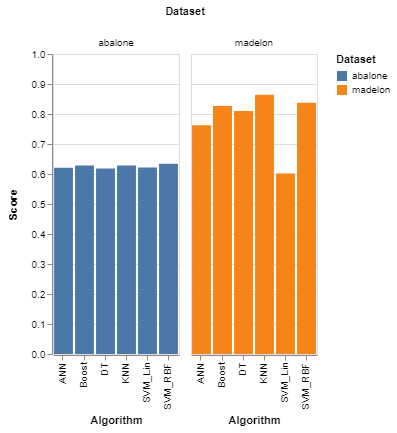

In [7]:
alt.Chart(results).mark_bar().encode(
    x='Algorithm:N',
    y=alt.Y('Score:Q', scale=alt.Scale(domain=[0.0, 1.0])),
    column='Dataset:N',
    color='Dataset:N'
)

## Load into DataFrames

In [8]:
df_dict = {}
for fname in relevant_files:
    key = fname.split('.')[0]
    df_dict[key] = pd.read_csv(RESULTS_PATH / fname)
df_dict.keys()

dict_keys(['ANN_abalone_LC_test', 'ANN_abalone_LC_train', 'ANN_abalone_reg', 'ANN_abalone_timing', 'ITERtestSET_ANN_abalone', 'ITERtestSET_ANN_OF_abalone', 'ITER_base_ANN_abalone', 'ITER_base_ANN_OF_abalone'])

In [9]:
df_dict['ANN_abalone_timing']

,Unnamed: 0,test,train
0,0.1,0.000703,3.541534
1,0.2,0.001253,3.452417
2,0.3,0.001380,2.824890
3,0.4,0.001919,1.716508
4,0.5,0.002644,1.597426
5,0.6,0.005458,1.638496
6,0.7,0.024314,1.730237
7,0.8,0.003949,1.188533
8,0.9,0.009882,0.797789


## Seperate Into Learning Curves, Timing Curves, OF curves

In [10]:
# test_learning_df =  df_dict['ANN_abalone_LC_test']
# CV_cols = ['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5']
# test_learning_df.columns = ['Iterations'] + CV_cols
# test_learning_df['CV_Mean'] = test_learning_df[CV_cols].mean(axis=1)
# test_learning_df['Split'] = 'Test'
# test_learning_df[['Iterations', 'Split', 'CV_Mean']]

def tidy_learning_curve(base_df, split=None, dataset=None, algorithm=None):
    """Convert a learning curve df into tidy format depending
    on train/test split specified"""
    assert split.upper() in ['TRAIN', 'TEST'], \
    'Split must be "Train" or "Test"'
    CV_cols = ['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5']
    tidy_df = base_df.copy()
    tidy_df.columns = ['Iterations'] + CV_cols
    tidy_df['CV_Mean'] = tidy_df[CV_cols].mean(axis=1)
    tidy_df['Split'] = split
    tidy_df[['Iterations', 'Split', 'CV_Mean']]
    
    # Optionally add algorithm and dataset
    if algorithm:
        tidy_df['Algorithm'] = algorithm
    if dataset:
        tidy_df['Dataset'] = dataset    
    return tidy_df

def get_learning_curve_dfs(df_dict, algorithm=None, dataset=None):
    """Given a dictionary with keys of fnames and values
    of dataframes, search for learning curve dfs, tidy them 
    and return them as a single dataframe"""
    learning_curve_dfs = []
    # Search in df_dict for LC which indicates
    # Learning curve df
    for key, df in df_dict.items():
        if 'LC' in key.split('_'):
            #print(key)
            split = key.split("_")[-1]
            #print(f'Split: {split}')
            #display(df.head())
            # Tidy data and append to list
            learning_curve_dfs.append(tidy_learning_curve(df, split=split,
                                                         algorithm=algorithm,
                                                         dataset=dataset))
    # Concat together
    #[display(df) for df in learning_curve_dfs]
    learning_curve_df = pd.concat(learning_curve_dfs)
    return learning_curve_df

In [11]:
get_learning_curve_dfs(df_dict).Split.value_counts()

train    9
test     9
Name: Split, dtype: int64

In [12]:


learning_curve_dfs = []
for key, df in df_dict.items():
    if 'LC' in key.split('_'):
        #print(key)
        #display(df.head())
        learning_curve_dfs.append(tidy_learning_curve(df, split=key.split('_')[-1]))
learning_curve_df = pd.concat(learning_curve_dfs)
learning_curve_df.head()



,Iterations,CV_1,CV_2,CV_3,CV_4,CV_5,CV_Mean,Split
0,50,0.316904,0.323366,0.323111,0.327473,0.329275,0.324026,test
1,100,0.316904,0.315999,0.326412,0.329123,0.316511,0.320990,test
2,292,0.314512,0.333743,0.349687,0.355328,0.347818,0.340217,test
3,584,0.580134,0.522382,0.563320,0.596177,0.564421,0.565287,test
4,876,0.579866,0.546540,0.558431,0.569120,0.552822,0.561356,test


## Plot

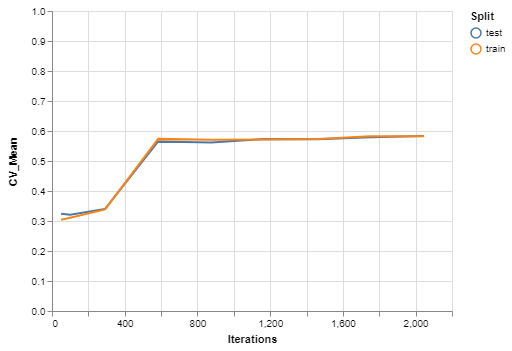

In [13]:
alt.Chart(get_learning_curve_dfs(df_dict)).mark_line().encode(
    x='Iterations:Q',
    y=alt.Y('CV_Mean:Q', scale=alt.Scale(domain=[0.0, 1.0])),
    color='Split:N'
)

#### Timing Curve

In [14]:
def tidy_timing_curve(timing_df, algorithm=None, dataset=None):
    """Convert a learning curve df into tidy format"""

    tidy_timing_df = timing_df.copy()
    tidy_timing_df.columns = ['Training_Fractional_Size', 'Test', 'Train']
    # Originally the first column is the test size
    # So setting the training size is just 1 - this
    tidy_timing_df['Training_Fractional_Size'] = (1 - tidy_timing_df['Training_Fractional_Size']).round(2)
    tidy_timing_df = tidy_timing_df.melt(id_vars='Training_Fractional_Size', var_name='Function', value_name='Time')
    tidy_timing_df['Function'] = tidy_timing_df['Function'].map({'Test':'Predict', 'Train':'Fit'})
    
    # Optionally add algorithm and dataset
    if algorithm:
        tidy_timing_df['Algorithm'] = algorithm
    if dataset:
        tidy_timing_df['Dataset'] = dataset
    return tidy_timing_df
    
def get_timing_curve(df_dict, algorithm=None, dataset=None):
    timing_curves = []
    for key, df in df_dict.items():
        if 'timing' in key.split('_'):
            timing_df = df.copy()
            timing_df = tidy_timing_curve(timing_df, algorithm=algorithm, dataset=dataset)
            timing_curves.append(timing_df)
    timing_curve_df = pd.concat(timing_curves)
    return timing_curve_df

In [15]:
df_dict['ANN_abalone_timing']

,Unnamed: 0,test,train
0,0.1,0.000703,3.541534
1,0.2,0.001253,3.452417
2,0.3,0.001380,2.824890
3,0.4,0.001919,1.716508
4,0.5,0.002644,1.597426
5,0.6,0.005458,1.638496
6,0.7,0.024314,1.730237
7,0.8,0.003949,1.188533
8,0.9,0.009882,0.797789


In [16]:
get_timing_curve(df_dict, dataset='abalone', algorithm='ANN')

,Training_Fractional_Size,Function,Time,Algorithm,Dataset
0,0.9,Predict,0.000703,ANN,abalone
1,0.8,Predict,0.001253,ANN,abalone
2,0.7,Predict,0.001380,ANN,abalone
3,0.6,Predict,0.001919,ANN,abalone
4,0.5,Predict,0.002644,ANN,abalone
5,0.4,Predict,0.005458,ANN,abalone
6,0.3,Predict,0.024314,ANN,abalone
7,0.2,Predict,0.003949,ANN,abalone
8,0.1,Predict,0.009882,ANN,abalone
9,0.9,Fit,3.541534,ANN,abalone


## Plot Timing Curve

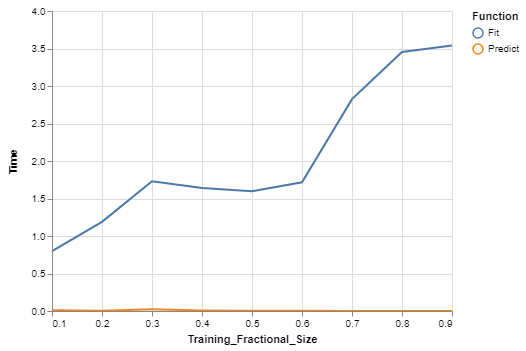

In [17]:
alt.Chart(get_timing_curve(df_dict, dataset='abalone', algorithm='ANN')).mark_line().encode(
    x='Training_Fractional_Size:Q',
    y='Time:Q',
    color='Function:N'
)

## Hyperparameter Charts

Each inddividual algorithm is going to have different hyper parameters

To come up with meaningful plots, may have to do facet plots across 
the alpha values and other 

Columns/Colors can be nominal

Y should be cross val score or time

In [18]:
df_dict['ANN_abalone_reg'].head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_MLP__activation,param_MLP__alpha,param_MLP__hidden_layer_sizes,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.225997,0.001601,0.581741,0.586657,relu,10.0,"(10,)","{'MLP__activation': 'relu', 'MLP__alpha': 10.0...",40,0.551251,...,0.584358,0.591831,0.588927,0.582695,0.580703,0.589934,0.057442,0.000801,0.017127,0.007014
1,0.256000,0.001402,0.531294,0.532930,relu,10.0,"(5,)","{'MLP__activation': 'relu', 'MLP__alpha': 10.0...",136,0.522201,...,0.520757,0.543399,0.554373,0.530121,0.531280,0.535905,0.086310,0.000488,0.012144,0.010654
2,0.125401,0.001999,0.541019,0.543287,relu,10.0,"(20,)","{'MLP__activation': 'relu', 'MLP__alpha': 10.0...",103,0.544865,...,0.522013,0.533139,0.534003,0.530742,0.528284,0.535424,0.034865,0.001097,0.018981,0.013186
3,0.184801,0.002599,0.542441,0.546791,relu,10.0,"(10, 10)","{'MLP__activation': 'relu', 'MLP__alpha': 10.0...",96,0.556592,...,0.519567,0.555113,0.564541,0.542333,0.543005,0.551032,0.035226,0.002724,0.016773,0.008002
4,0.171400,0.001600,0.505071,0.510227,relu,10.0,"(5, 5)","{'MLP__activation': 'relu', 'MLP__alpha': 10.0...",162,0.361345,...,0.539315,0.551384,0.548433,0.545998,0.522466,0.550251,0.055953,0.000800,0.072766,0.072363


## Overfitting Charts

In [19]:
df_dict.keys()

dict_keys(['ANN_abalone_LC_test', 'ANN_abalone_LC_train', 'ANN_abalone_reg', 'ANN_abalone_timing', 'ITERtestSET_ANN_abalone', 'ITERtestSET_ANN_OF_abalone', 'ITER_base_ANN_abalone', 'ITER_base_ANN_OF_abalone'])

ITER_base_ANN_OF_abalone


Could do column for time vs score or something
Column could also be overfitting or not

X is iterations
Y is score or time

Color is Train/Test

Scatterplot iteration by time, score is gradient of color

In [210]:

testing_non_OF = df_dict['ITERtestSET_ANN_abalone']
testing_OF = df_dict['ITERtestSET_ANN_OF_abalone']
testing_non_OF.iloc[:, 0].name

def get_overfitting_curve(df_dict, algorithm=None, dataset=None):
    iter_dfs = []
    for key, df in df_dict.items():
        if 'ITERtestSET' in key.split('_'):
            if 'OF' in key.split('_'):
                of_iter_df = df.copy()
                of_iter_df = tidy_iter_df(of_iter_df, param_set='No_Regularization', 
                                          algorithm=algorithm, dataset=dataset)
                iter_dfs.append(of_iter_df)
            else:
                non_of_iter_df = df.copy()
                non_of_iter_df = tidy_iter_df(non_of_iter_df, param_set='Best_Hyperparameters', 
                                          algorithm=algorithm, dataset=dataset)
                iter_dfs.append(non_of_iter_df)                
    #iter_dfs =pd.concat(iter_dfs)
    return iter_dfs

In [214]:
def tidy_iter_df(iter_df, param_set=None, dataset=None, algorithm=None):
    # Melt data
    # Find max iteration columns
    iteration_column = iter_df.filter(regex='(_max_iter$|_estimators$|_iter$)').columns.values.tolist()[0]
    
    tidied_iter_df = (pd.melt(iter_df, id_vars=iteration_column, var_name='Split', value_name='Score')
                     .rename(columns={iteration_column:'Max_Iterations/Estimators'}))
    # Clean up split
    tidied_iter_df.Split = tidied_iter_df.Split.str.split(' ').str.get(0).str.title()
    # Add apram_set (e.g. overfitting or not), dataset, algorithm if applicacable
    tidied_iter_df['Hyperparameters'] = param_set    
    if algorithm:
        tidied_iter_df['Algorithm'] = algorithm
    if dataset:
        tidied_iter_df['Dataset'] = dataset
    return tidied_iter_df



# overfitting_analysis_df = pd.concat([tidy_iter_df(testing_OF, param_set='No_Regularization', dataset='Abalone', algorithm='NN'),
#            tidy_iter_df(testing_non_OF, param_set='Best_Hyperparameters', dataset='Abalone', algorithm='NN'),
#           ])

In [215]:
a, b = get_overfitting_curve(df_dict)
a.head()

,Max_Iterations/Estimators,Split,Score,Hyperparameters
0,1,Test,0.482236,Best_Hyperparameters
1,2,Test,0.553529,Best_Hyperparameters
2,4,Test,0.578643,Best_Hyperparameters
3,8,Test,0.611336,Best_Hyperparameters
4,16,Test,0.633146,Best_Hyperparameters


## Plot Overfitting curve

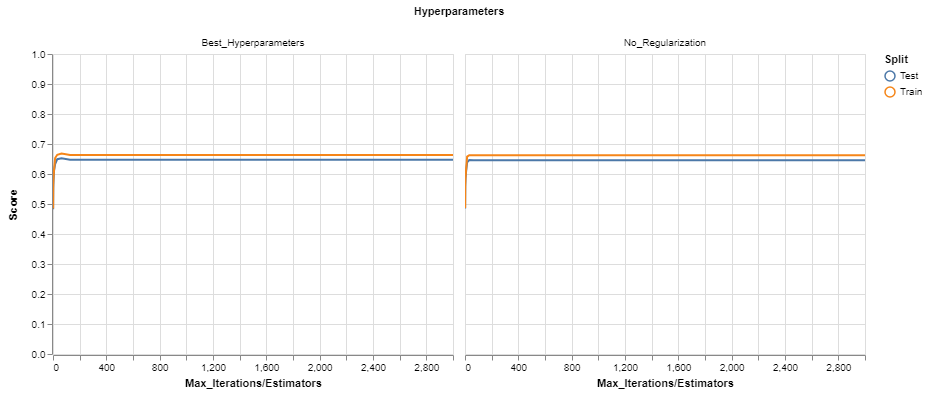

In [205]:
alt.Chart(get_overfitting_curve(df_dict, dataset='abalone', algorithm='ANN')).mark_line().encode(
    x=alt.X('Max_Iterations/Estimators:Q', axis=alt.Axis(title='Max_Iterations/Estimators')),
    y=alt.Y('Score:Q', scale=alt.Scale(domain=[0.0, 1.0])),
    color='Split:N',
    column='Hyperparameters:N'
).interactive()

## Get Best number of Iterations

* Best number using the GridSearchCV hyperparameters search

* Best number using the OF parameters

In [39]:
# Colum with iteration numbers is one that ends with 'max_iter'
iter_column = df_dict['ITER_base_ANN_OF_abalone'].filter(regex='_max_iter$').columns.values.tolist()
# Sort by best test score and the locate the iterations column
best_iterations = df_dict['ITER_base_ANN_OF_abalone'].sort_values(by='rank_test_score').loc[:, iter_column].values[0]
best_iterations[0]

32

In [23]:
df_dict.keys()

dict_keys(['ANN_abalone_LC_test', 'ANN_abalone_LC_train', 'ANN_abalone_reg', 'ANN_abalone_timing', 'ITERtestSET_ANN_abalone', 'ITERtestSET_ANN_OF_abalone', 'ITER_base_ANN_abalone', 'ITER_base_ANN_OF_abalone'])

## Get best number of iterations for best params and OF params

In [150]:
def get_optimal_iteration_number(df_dict, params='best'):
    """Pull the optimal number of iterations to run an 
    algorithm given either the 'best' hyperparams or 
    'overfitting' params"""
    assert params in ['best', 'overfitting'], \
    "params arg must be either 'best' or 'overfitting'"
    iterations_df_dict = {}
    for key, df in df_dict.items():
        # Check if it's the search across iteration 
        # number
        if key.startswith('ITER_base'):
            # Add to relevant dfs
            iterations_df_dict[key] = df

    for key, df in iterations_df_dict.items():
        key_splits = key.split('_')
        # Check if it's an overfitting df
        if 'OF' in key_splits:
            # Colum with iteration numbers is one that ends with 'max_iter'
            iter_column = df.filter(regex='(_max_iter$|_estimators$|_iter$)').columns.values.tolist()
            assert iter_column, """No matching colum that ends with "_max_iter" or "n_estimators" 
            or "n_iter" found in file {}""".format(key)        
            # Sort by best test score and the locate the iterations column
            OF_best_iteration = df.sort_values(by='rank_test_score').loc[:, iter_column].values[0][0]
        # Otherwise it's the best hyperparameters search
        else:
            # Colum with iteration numbers is one that ends with 'max_iter'
            iter_column = df.filter(regex='(_max_iter$|_estimators$|_iter$)').columns.values.tolist()
            #print(df)
            assert iter_column, """No matching colum that ends with "_max_iter" or "n_estimators" 
            or "n_iter" found in file {}""".format(key)           
            # Sort by best test score and the locate the iterations column
            best_iteration = df.sort_values(by='rank_test_score').loc[:, iter_column].values[0][0]
    
    if params=='best':
        return best_iteration
    elif params=='overfitting':
        return OF_best_iteration

## Get best number of iterations for all datasets and algorithm

In [143]:
from itertools import product
list(product(['abalone', 'madelon'], 
                                       ['ANN', 'Boost', 'SVMLin', 'SVMRBF']))

[('abalone', 'ANN'),
 ('abalone', 'Boost'),
 ('abalone', 'SVMLin'),
 ('abalone', 'SVMRBF'),
 ('madelon', 'ANN'),
 ('madelon', 'Boost'),
 ('madelon', 'SVMLin'),
 ('madelon', 'SVMRBF')]

In [144]:
get_df_dict_from_algorithm_dataset('reports/output/', algorithm='SVMLin')

{}

In [216]:
def get_all_best_iters(fpath, datasets=None, algorithms=None, tidy=True):
    from itertools import product
    dataset_algorithm_pairs = list(product(datasets, algorithms))
    
    rows = []
    for dataset_algorithm_combo in dataset_algorithm_pairs:
        df_dict = get_df_dict_from_algorithm_dataset(fpath, 
                                                     dataset=dataset_algorithm_combo[0],
                                                     algorithm=dataset_algorithm_combo[1])
        overfitting_best_iteration = get_optimal_iteration_number(df_dict, params='overfitting')
        best_iteration = get_optimal_iteration_number(df_dict, params='best')
        rows.append([dataset_algorithm_combo[0], dataset_algorithm_combo[1], 
                    best_iteration, overfitting_best_iteration])
    best_iterations = pd.DataFrame(rows, columns=['Dataset', 'Algorithm', 
                                                'Best_Params_Iterations', 'No_Regularization_Params'])
    if tidy:
        best_iterations = pd.melt(best_iterations, id_vars=['Dataset', 'Algorithm'],
                                 var_name='Hyperparameters', value_name='Best_Number_of_Iterations/Estimators')
        best_iterations['Hyperparameters'] = (best_iterations['Hyperparameters'].str.split('_')
                                             .str.slice(0, -1)
                                             .str.join('_')
                                            )
    return best_iterations
   
    

In [217]:
# test_iter = pd.read_csv('reports/output/ITER_base_SVMLin_abalone.csv')
# test_ter.
# test_iter.filter(regex='(_max_iter$|_estimators$)').columns.values.tolist()

In [218]:
best_number_of_iterations = get_all_best_iters('reports/output/', datasets=['abalone', 'madelon'],
algorithms=['ANN', 'Boost', 'SVMLin', 'SVMRBF'])

best_number_of_iterations.to_csv('reports/output/best_number_of_iterations_by_data_algorithm_params.csv', index=False)

In [59]:
get_optimal_iteration_number(df_dict, params='overfitting')

32

## Rename SVM Files to Seperate Easier

In [148]:
def file_search_and_replace(directory, search, replace, verbose=True):
    """Given a directory, search all filenames in it for the regex
    pattern provided. If found, replace with the provided string 
    by renaming.
    Set verbose=True to see which files are renamed"""
    from pathlib import Path
    import re
    # Make path out of provided directory
    directory_path = Path(directory)
    # Search directory fielnames
    for filename in os.listdir(directory_path):
        # If there's a pattern match
        if re.search(search, filename):
            # Create a new filename replacing the old pattern
            new_fname = re.sub(search, replace, filename)
            # Rename it
            os.rename(directory_path / filename, directory_path / new_fname)
            # If verbose print the renamed files
            if verbose:
                print(f'Rename:\n{directory_path / filename}\nTo:\n{directory_path / new_fname}\n\n')
            
# # for filename in os.listdir(RESULTS_PATH):
# #     if filename.startswith("SVM_Lin"):
# #         print(filename)
# #         print('SVMLin'+filename.split('SVM_Lin')[1])
# #         #os.rename(filename, filename[7:])

file_search_and_replace('reports/output/', search='SVMLin', replace='SVMLin_', verbose=True)

Rename:
reports\output\ITERtestSET_SVMLinOF_abalone.csv
To:
reports\output\ITERtestSET_SVMLin_OF_abalone.csv


Rename:
reports\output\ITERtestSET_SVMLinOF_madelon.csv
To:
reports\output\ITERtestSET_SVMLin_OF_madelon.csv


Rename:
reports\output\ITERtestSET_SVMLin_abalone.csv
To:
reports\output\ITERtestSET_SVMLin__abalone.csv


Rename:
reports\output\ITERtestSET_SVMLin_madelon.csv
To:
reports\output\ITERtestSET_SVMLin__madelon.csv


Rename:
reports\output\ITER_base_SVMLinOF_abalone.csv
To:
reports\output\ITER_base_SVMLin_OF_abalone.csv


Rename:
reports\output\ITER_base_SVMLinOF_madelon.csv
To:
reports\output\ITER_base_SVMLin_OF_madelon.csv


Rename:
reports\output\ITER_base_SVMLin_abalone.csv
To:
reports\output\ITER_base_SVMLin__abalone.csv


Rename:
reports\output\ITER_base_SVMLin_madelon.csv
To:
reports\output\ITER_base_SVMLin__madelon.csv


Rename:
reports\output\SVMLin_abalone_LC_test.csv
To:
reports\output\SVMLin__abalone_LC_test.csv


Rename:
reports\output\SVMLin_abalone_LC_trai